In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [2]:
NN = tf.keras.models.Sequential([
    tf.keras.layers.Input((1,)),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 32, activation = 'tanh'),
    tf.keras.layers.Dense(units = 1)
])

NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


In [21]:

t_0 = tf.zeros((1,1))
initial_a=tf.fill([1,1],-0.0000566758)
vl = tf.fill([1,1],-0.0042040714285714285)
vr = tf.fill([1,1],0.004339750000000001)
d = tf.fill([1,1],0.321/1000)
gap_h = tf.fill([1,1],-0.000091020)
up_h = tf.fill([1,1],0.0002)
xl = tf.fill([1,1],0)
xr = d
hl_0 = up_h
hr_0 = - gap_h + up_h
b_0 = (hl_0+hr_0)/2-(d-0/(hr_0-hl_0))*(initial_a-d/2)
r_0 = np.sqrt((0.0-initial_a)**2+(hl_0-b_0)**2)
theta_1_0 = np.arctan((hl_0-b_0)/(0-initial_a))
theta_2_0 = np.arctan((hr_0-b_0)/(d-initial_a))
theta_0 = theta_1_0 - theta_2_0
point_1_0 = (hl_0*initial_a)/(hl_0-b_0)
point_2_0 = d +(initial_a-d)*hr_0/(hr_0-b_0)
fan_shape_0 = 0.5*theta_0*(r_0**2)
triangle_1_0 = 0.5*point_1_0*hl_0
triangle_2_0 = 0.5*(d-point_2_0)*hr_0
triangle_3_0 = 0.5*(point_2_0-point_1_0)*b_0
area_0 =  fan_shape_0 + triangle_1_0 + triangle_2_0 + triangle_3_0
print(area_0)

tf.Tensor([[8.659549e-08]], shape=(1, 1), dtype=float32)


In [3]:
def ode_system(t, net):
    t = t.reshape(-1,1)
    t = tf.constant(t, dtype = tf.float32)
    t_0 = tf.zeros((1,1))
    initial_a=tf.fill([1,1],-0.0000566758)
    vl = tf.fill([1,1],-0.0042040714285714285)
    vr = tf.fill([1,1],0.004339750000000001)
    d = tf.fill([1,1],0.321/1000)
    gap_h = tf.fill([1,1],-0.000091020)
    up_h = tf.fill([1,1],0.0002)

    with tf.GradientTape() as tape:
        tape.watch(t)

        u = net(t)
        a = u
        xl = tf.fill([1,1],0)
        xr = d
        hl = vl*t + up_h
        hr = vr*t  - gap_h + up_h
        b = (hl+hr)/2-(d-0/(hr-hl))*(a-d/2)
        r = np.sqrt((0.0-a)**2+(hl-b)**2)

        theta_1 = np.arctan((hl-b)/(0-a))
        theta_2 = np.arctan((hr-b)/(d-a))

        theta = theta_1 - theta_2

        point_1 = (hl*a)/(hl-b)

        point_2 = d +(a-d)*hr/(hr-b)

        fan_shape = 0.5*theta*(r**2)

        triangle_1 = 0.5*point_1*hl

        triangle_2 = 0.5*(d-point_2)*hr

        triangle_3 = 0.5*(point_2-point_1)*b

        area =  fan_shape + triangle_1 + triangle_2 + triangle_3

        area_t = tape.gradient(area, t)

    ode_loss = area_t

    a_0=net(t_0)
    xl = tf.fill([1,1],0)
    xr = d
    hl_0 = up_h
    hr_0 = - gap_h + up_h
    b_0 = (hl_0+hr_0)/2-(d-0/(hr_0-hl_0))*(a_0-d/2)
    r_0 = np.sqrt((0.0-a_0)**2+(hl_0-b_0)**2)
    theta_1_0 = np.arctan((hl_0-b_0)/(0-a_0))
    theta_2_0 = np.arctan((hr_0-b_0)/(d-a_0))
    theta_0 = theta_1_0 - theta_2_0
    point_1_0 = (hl_0*a_0)/(hl_0-b_0)
    point_2_0 = d +(a_0-d)*hr_0/(hr_0-b_0)
    fan_shape_0 = 0.5*theta_0*(r_0**2)
    triangle_1_0 = 0.5*point_1_0*hl_0
    triangle_2_0 = 0.5*(d-point_2_0)*hr_0
    triangle_3_0 = 0.5*(point_2_0-point_1_0)*b_0
    pred_area_0 =  fan_shape_0 + triangle_1_0 + triangle_2_0 + triangle_3_0

    IC_loss = pred_area_0  - tf.fill([1,1],5.700998800693915e-08)

    square_loss = tf.square(ode_loss) + tf.square(IC_loss)
    total_loss = tf.reduce_mean(square_loss)

    return total_loss


In [4]:
optm = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [43]:
print(np.linspace(0.0097,0.0282,1000).reshape(-1,1))

[[0.0097    ]
 [0.00971852]
 [0.00973704]
 [0.00975556]
 [0.00977407]
 [0.00979259]
 [0.00981111]
 [0.00982963]
 [0.00984815]
 [0.00986667]
 [0.00988519]
 [0.0099037 ]
 [0.00992222]
 [0.00994074]
 [0.00995926]
 [0.00997778]
 [0.0099963 ]
 [0.01001481]
 [0.01003333]
 [0.01005185]
 [0.01007037]
 [0.01008889]
 [0.01010741]
 [0.01012593]
 [0.01014444]
 [0.01016296]
 [0.01018148]
 [0.0102    ]
 [0.01021852]
 [0.01023704]
 [0.01025556]
 [0.01027407]
 [0.01029259]
 [0.01031111]
 [0.01032963]
 [0.01034815]
 [0.01036667]
 [0.01038519]
 [0.0104037 ]
 [0.01042222]
 [0.01044074]
 [0.01045926]
 [0.01047778]
 [0.0104963 ]
 [0.01051481]
 [0.01053333]
 [0.01055185]
 [0.01057037]
 [0.01058889]
 [0.01060741]
 [0.01062593]
 [0.01064444]
 [0.01066296]
 [0.01068148]
 [0.0107    ]
 [0.01071852]
 [0.01073704]
 [0.01075556]
 [0.01077407]
 [0.01079259]
 [0.01081111]
 [0.01082963]
 [0.01084815]
 [0.01086667]
 [0.01088519]
 [0.0109037 ]
 [0.01092222]
 [0.01094074]
 [0.01095926]
 [0.01097778]
 [0.0109963 ]
 [0.01

3.501647e-10
1.299062e-11
1.7990805e-12
2.1127345e-13
2.2760158e-14
3.0823853e-15


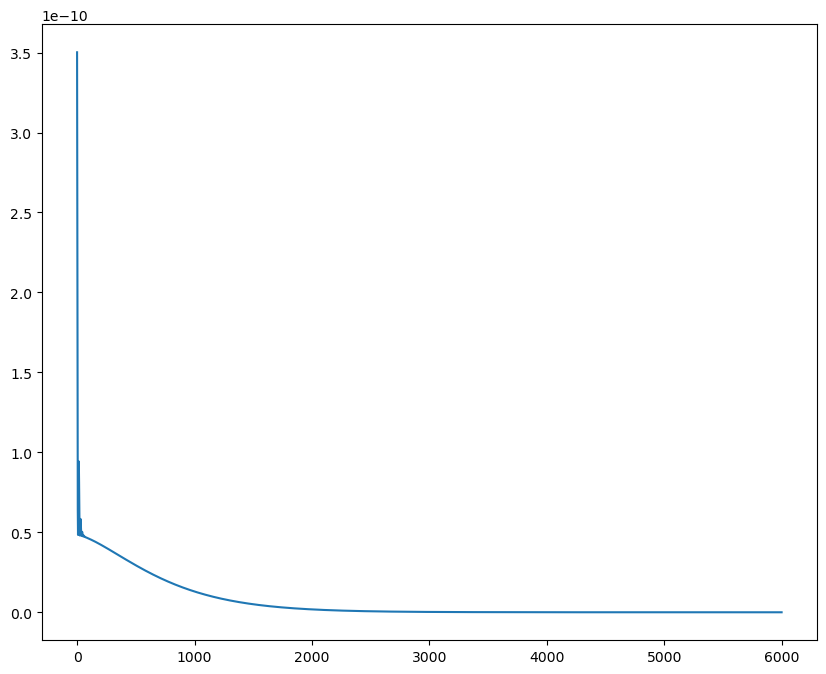

In [5]:
train_t = (np.random.rand(10000)).reshape(-1, 1)*0.0282
#train_t =np.linspace(0.0097,0.0282,10000).reshape(-1,1)
train_loss_record = []

for itr in range(6000):
    with tf.GradientTape() as tape:
        train_loss = ode_system(train_t, NN)
        train_loss_record.append(train_loss)

        grad_w = tape.gradient(train_loss, NN.trainable_variables)
        optm.apply_gradients(zip(grad_w, NN.trainable_variables))

    if itr % 1000 == 0:
        print(train_loss.numpy())

plt.figure(figsize = (10,8))
plt.plot(train_loss_record)
plt.show()

In [6]:
print(NN.predict(np.linspace(0.0,0.0282,282)))

9/9 [==============================] - 0s 4ms/step
[[0.00017715]
 [0.00017713]
 [0.0001771 ]
 [0.00017707]
 [0.00017704]
 [0.00017702]
 [0.00017699]
 [0.00017696]
 [0.00017694]
 [0.00017691]
 [0.00017688]
 [0.00017685]
 [0.00017683]
 [0.0001768 ]
 [0.00017677]
 [0.00017675]
 [0.00017672]
 [0.00017669]
 [0.00017667]
 [0.00017664]
 [0.00017661]
 [0.00017658]
 [0.00017656]
 [0.00017653]
 [0.0001765 ]
 [0.00017648]
 [0.00017645]
 [0.00017642]
 [0.00017639]
 [0.00017637]
 [0.00017634]
 [0.00017631]
 [0.00017628]
 [0.00017626]
 [0.00017623]
 [0.0001762 ]
 [0.00017618]
 [0.00017615]
 [0.00017612]
 [0.00017609]
 [0.00017607]
 [0.00017604]
 [0.00017601]
 [0.00017599]
 [0.00017596]
 [0.00017593]
 [0.0001759 ]
 [0.00017588]
 [0.00017585]
 [0.00017582]
 [0.00017579]
 [0.00017577]
 [0.00017574]
 [0.00017571]
 [0.00017569]
 [0.00017566]
 [0.00017563]
 [0.0001756 ]
 [0.00017558]
 [0.00017555]
 [0.00017552]
 [0.00017549]
 [0.00017547]
 [0.00017544]
 [0.00017541]
 [0.00017538]
 [0.00017536]
 [0.0001753

In [32]:
train_t = (np.random.rand(10000)).reshape(-1, 1)*0.0282
print(train_t)

[[0.02253718]
 [0.00561955]
 [0.00901442]
 ...
 [0.01581234]
 [0.00446901]
 [0.00689596]]
